In [2]:
model_param = 'xgboost'

fig_name_param = model_param + '_sfbs.tiff'
fig_name_param

'xgboost_sfbs.tiff'

In [3]:
#use euroExpansionVirtEnv virtural environment to ensure Xgboost library is working
!pip install pandas

import pandas as pd
import csv
import os

full_path = 'C:/Users/qiani/Documents/ADB role university/variableSelection/modelInput/2012_2016/varSelectES_II_Month_preProcessed_training_2012_2016.csv'

cardioDataCal_AKI_Train = pd.read_csv(full_path, encoding = "ISO-8859-1")
cardioDataCal_AKI_Train

You should consider upgrading via the 'C:\Users\qiani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


,Unnamed: 0,ES_II_link_ID,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,...,Median.Sternotomy,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,OpDate,Year,mtly,yearMonth,CardiacRhythm,mechanicalSupport
0,2,124591,33,1,0,1,2,0,1,3,...,1,0,0,6,2015-07-16,2015,0,2015-07,0,0
1,4,104613,11,2,1,1,0,1,0,0,...,1,0,0,1,2015-09-30,2015,0,2015-09,0,0
2,5,652009,13,1,0,1,2,1,0,0,...,1,0,0,8,2012-01-17,2012,0,2012-01,0,0
3,6,664276,28,1,0,1,2,0,1,3,...,1,0,0,4,2012-01-13,2012,0,2012-01,0,0
4,7,109021,9,3,0,1,2,1,1,1,...,1,0,0,9,2015-07-15,2015,0,2015-07,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,224314,40542,37,1,0,1,3,1,0,0,...,1,0,0,9,2013-05-28,2013,0,2013-05,0,0
155260,224315,42115,5,3,0,1,3,0,0,0,...,1,0,0,10,2013-06-21,2013,0,2013-06,1,0
155261,224316,4490,11,1,0,1,0,3,0,0,...,1,0,0,1,2012-05-11,2012,0,2012-05,0,0
155262,224317,100086,11,6,1,1,0,2,0,0,...,1,0,0,1,2015-10-13,2015,0,2015-10,0,0


In [4]:
N = 1
# Drop first N columns of dataframe
cardioDataCal_AKI_Train = cardioDataCal_AKI_Train.iloc[: , N:]
cardioDataCal_AKI_Train

,ES_II_link_ID,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,PCI,...,Median.Sternotomy,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,OpDate,Year,mtly,yearMonth,CardiacRhythm,mechanicalSupport
0,124591,33,1,0,1,2,0,1,3,0,...,1,0,0,6,2015-07-16,2015,0,2015-07,0,0
1,104613,11,2,1,1,0,1,0,0,0,...,1,0,0,1,2015-09-30,2015,0,2015-09,0,0
2,652009,13,1,0,1,2,1,0,0,1,...,1,0,0,8,2012-01-17,2012,0,2012-01,0,0
3,664276,28,1,0,1,2,0,1,3,0,...,1,0,0,4,2012-01-13,2012,0,2012-01,0,0
4,109021,9,3,0,1,2,1,1,1,1,...,1,0,0,9,2015-07-15,2015,0,2015-07,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,40542,37,1,0,1,3,1,0,0,0,...,1,0,0,9,2013-05-28,2013,0,2013-05,0,0
155260,42115,5,3,0,1,3,0,0,0,0,...,1,0,0,10,2013-06-21,2013,0,2013-06,1,0
155261,4490,11,1,0,1,0,3,0,0,0,...,1,0,0,1,2012-05-11,2012,0,2012-05,0,0
155262,100086,11,6,1,1,0,2,0,0,0,...,1,0,0,1,2015-10-13,2015,0,2015-10,0,0


In [5]:
#Move metadata to rhs of dataset: mtly, Year, yearMonth, OpDate, ES_II_link_ID, 
#partition these during cv and save separately as single dataframe with correspondence to prediction

#re-ordering columns for outcome and year
new_cols = [col for col in cardioDataCal_AKI_Train.columns if col != 'mtly'] + ['mtly']
df = cardioDataCal_AKI_Train[new_cols]
new_cols = [col for col in df.columns if col != 'Year'] + ['Year']
df = df[new_cols]
new_cols = [col for col in df.columns if col != 'yearMonth'] + ['yearMonth']
df = df[new_cols]
new_cols = [col for col in df.columns if col != 'OpDate'] + ['OpDate']
df = df[new_cols]
new_cols = [col for col in df.columns if col != 'ES_II_link_ID'] + ['ES_II_link_ID']
df = df[new_cols]
df

,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,PCI,PrevCABG,...,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,CardiacRhythm,mechanicalSupport,mtly,Year,yearMonth,OpDate,ES_II_link_ID
0,33,1,0,1,2,0,1,3,0,0,...,0,0,6,0,0,0,2015,2015-07,2015-07-16,124591
1,11,2,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,2015,2015-09,2015-09-30,104613
2,13,1,0,1,2,1,0,0,1,0,...,0,0,8,0,0,0,2012,2012-01,2012-01-17,652009
3,28,1,0,1,2,0,1,3,0,0,...,0,0,4,0,0,0,2012,2012-01,2012-01-13,664276
4,9,3,0,1,2,1,1,1,1,0,...,0,0,9,0,0,0,2015,2015-07,2015-07-15,109021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,37,1,0,1,3,1,0,0,0,0,...,0,0,9,0,0,0,2013,2013-05,2013-05-28,40542
155260,5,3,0,1,3,0,0,0,0,0,...,0,0,10,1,0,0,2013,2013-06,2013-06-21,42115
155261,11,1,0,1,0,3,0,0,0,0,...,0,0,1,0,0,0,2012,2012-05,2012-05-11,4490
155262,11,6,1,1,0,2,0,0,0,0,...,0,0,1,0,0,0,2015,2015-10,2015-10-13,100086


In [6]:
new_cols = [col for col in df.columns if col != 'Year'] + ['Year']
df = df[new_cols]
df

,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,PCI,PrevCABG,...,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,CardiacRhythm,mechanicalSupport,mtly,yearMonth,OpDate,ES_II_link_ID,Year
0,33,1,0,1,2,0,1,3,0,0,...,0,0,6,0,0,0,2015-07,2015-07-16,124591,2015
1,11,2,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,2015-09,2015-09-30,104613,2015
2,13,1,0,1,2,1,0,0,1,0,...,0,0,8,0,0,0,2012-01,2012-01-17,652009,2012
3,28,1,0,1,2,0,1,3,0,0,...,0,0,4,0,0,0,2012-01,2012-01-13,664276,2012
4,9,3,0,1,2,1,1,1,1,0,...,0,0,9,0,0,0,2015-07,2015-07-15,109021,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,37,1,0,1,3,1,0,0,0,0,...,0,0,9,0,0,0,2013-05,2013-05-28,40542,2013
155260,5,3,0,1,3,0,0,0,0,0,...,0,0,10,1,0,0,2013-06,2013-06-21,42115,2013
155261,11,1,0,1,0,3,0,0,0,0,...,0,0,1,0,0,0,2012-05,2012-05-11,4490,2012
155262,11,6,1,1,0,2,0,0,0,0,...,0,0,1,0,0,0,2015-10,2015-10-13,100086,2015


In [7]:
#update re-ordered dataframe 
cardioDataCal_Eurosc_II_Train = df

cardioDataCal_Eurosc_II_Train

,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,PCI,PrevCABG,...,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,CardiacRhythm,mechanicalSupport,mtly,yearMonth,OpDate,ES_II_link_ID,Year
0,33,1,0,1,2,0,1,3,0,0,...,0,0,6,0,0,0,2015-07,2015-07-16,124591,2015
1,11,2,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,2015-09,2015-09-30,104613,2015
2,13,1,0,1,2,1,0,0,1,0,...,0,0,8,0,0,0,2012-01,2012-01-17,652009,2012
3,28,1,0,1,2,0,1,3,0,0,...,0,0,4,0,0,0,2012-01,2012-01-13,664276,2012
4,9,3,0,1,2,1,1,1,1,0,...,0,0,9,0,0,0,2015-07,2015-07-15,109021,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,37,1,0,1,3,1,0,0,0,0,...,0,0,9,0,0,0,2013-05,2013-05-28,40542,2013
155260,5,3,0,1,3,0,0,0,0,0,...,0,0,10,1,0,0,2013-06,2013-06-21,42115,2013
155261,11,1,0,1,0,3,0,0,0,0,...,0,0,1,0,0,0,2012-05,2012-05-11,4490,2012
155262,11,6,1,1,0,2,0,0,0,0,...,0,0,1,0,0,0,2015-10,2015-10-13,100086,2015


In [8]:
cardioDataCal_Eurosc_II_Train.iloc[:, 0:61]

,HospCode,Operation,Gender,Payer,CCS,NYHA,PrevMI,IntervalMI,PCI,PrevCABG,...,Ao.Root.Procedure,Ao.Asc.Procedure,Ao.Arch.Procedure,Ao.Desc.Procedure,Median.Sternotomy,Partial.Sternotomy,Mini.Thoracotomy,imdDecile,CardiacRhythm,mechanicalSupport
0,33,1,0,1,2,0,1,3,0,0,...,0,0,0,0,1,0,0,6,0,0
1,11,2,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,13,1,0,1,2,1,0,0,1,0,...,0,0,0,0,1,0,0,8,0,0
3,28,1,0,1,2,0,1,3,0,0,...,0,0,0,0,1,0,0,4,0,0
4,9,3,0,1,2,1,1,1,1,0,...,0,0,0,0,1,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155259,37,1,0,1,3,1,0,0,0,0,...,0,0,0,0,1,0,0,9,0,0
155260,5,3,0,1,3,0,0,0,0,0,...,0,0,0,0,1,0,0,10,1,0
155261,11,1,0,1,0,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
155262,11,6,1,1,0,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
#check outcome column indices 
cardioDataCal_Eurosc_II_TrainLabel = df.iloc[:, -5:-4]
cardioDataCal_Eurosc_II_TrainLabel.columns.values


array(['mtly'], dtype=object)

In [13]:
cardioDataCal_Eurosc_II_TrainLabel 

,mtly
0,0
1,0
2,0
3,0
4,0
...,...
155259,0
155260,0
155261,0
155262,0


In [49]:
!pip install mlxtend  

You should consider upgrading via the 'C:\Users\qiani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [11]:
import mlxtend

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
    
#using priors from "Comparison of Machine Learning Techniques in Prediction of Mortality following Cardiac Surgery: Analysis of over 220,000 patients from a Large National Database"
param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic', 'subsample': 0.6, 'min_child_weight': 1, 'gamma': 0.5, 'colsample_bytree': 0.8,
            'learning_rate' : 0.02, 'n_estimators' : 300}
param['seed'] = 7
      
    
clf = XGBClassifier(**param)  #https://stackoverflow.com/questions/56231582/xgboost-error-unknown-objective-function-regsquarederror

C:\Data_Code_Backups\Installation WorkPCToLaptop\jupyter_notebook\Python37\Scripts\Euroscore_expansion\euroExpansionVirtEnv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sbfs = SFS(clf, 
           k_features=(1, 29), 
           forward=False, #False for 30 to 61 or just 30
           floating=True,  
           verbose=2,
           scoring='roc_auc',
           cv=5,
           n_jobs=-1)

pipe = make_pipeline(StandardScaler(), sbfs)

pipe.fit(cardioDataCal_Eurosc_II_Train.iloc[:, 0:61], cardioDataCal_Eurosc_II_TrainLabel)


#sbfs = sbfs.fit(cardioDataCal_Eurosc_II_Train.iloc[:, 0:61], cardioDataCal_Eurosc_II_TrainLabel)
#print('\nSequential Backward Floating Selection (k=30):')
#print(sbfs.k_feature_idx_)
#print('CV Score:')
#print(sbfs.k_score_)
print('best combination (ACC: %.3f): %s\n' % (sbfs.k_score_, sbfs.k_feature_idx_))
print('all subsets:\n', sbfs.subsets_)
plot_sfs(sbfs.get_metric_dict(), kind='std_err');

In [ ]:
# subsets_ : dict
#         A dictionary of selected feature subsets during the
#         sequential selection, where the dictionary keys are
#         the lengths k of these feature subsets.

#copy subset above manually and store in a list 
#get_metric_dict - use https://github.com/rasbt/mlxtend/blob/33b9a6c10e1b8edbe594f8cbe790e7862722a23c/mlxtend/feature_selection/sequential_feature_selector.py#L856
#    subset to extract 95% CI 
#Pass dict manually to plot_sequential_feature_selection function:
#    https://github.com/rasbt/mlxtend/blob/33b9a6c10e1b8edbe594f8cbe790e7862722a23c/mlxtend/plotting/plot_sequential_feature_selection.py#L12
#Concatenate subsets dictionary {61 to 30} and {29 to 1} backward floating selection into one dictionary
#Then generate plot command 

#I think change kind to ci confidence interval instead latter when concatenating 
#also Find command to generate table from dictionary 
#pd.DataFrame.from_dict(sbs.get_metric_dict()).T

#we do backward floating from 61 to 30 variables sized subsets; then do backward floating from 29 to 1 variables 
#I am running the two separately as it is computationally costly otherwise. 

In [15]:
from array import array
subsets_ = {61: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83105034, 0.84598444, 0.84427695, 0.83255093, 0.83319578]), 'avg_score': 0.8374116888757112, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60')}, 60: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83201626, 0.84694629, 0.84535828, 0.83219344, 0.83266777]), 'avg_score': 0.837836409071042, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60')}, 59: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83144276, 0.84714761, 0.84501718, 0.83260868, 0.83291028]), 'avg_score': 0.8378253026000465, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60')}, 58: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83239414, 0.8471287 , 0.84491282, 0.83223458, 0.83292617]), 'avg_score': 0.8379192848059059, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60')}, 57: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83235539, 0.84676711, 0.8444591 , 0.83243792, 0.8326502 ]), 'avg_score': 0.8377339425479974, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '53', '54', '55', '56', '57', '58', '59', '60')}, 56: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83235219, 0.84727548, 0.84411464, 0.8321961 , 0.83267076]), 'avg_score': 0.8377218341143488, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 55: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83178887, 0.84725251, 0.8437476 , 0.83281477, 0.83266024]), 'avg_score': 0.8376527969965337, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 54: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83201873, 0.84679475, 0.84398399, 0.83175577, 0.83337398]), 'avg_score': 0.8375854455915597, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 53: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83244116, 0.84756509, 0.84382567, 0.83212761, 0.8330451 ]), 'avg_score': 0.8378009254378169, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 52: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83242561, 0.84747198, 0.84444306, 0.83216791, 0.83345485]), 'avg_score': 0.8379926813567646, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 51: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 59, 60), 'cv_scores': np.array([0.83271493, 0.84779338, 0.84398178, 0.83192318, 0.83406565]), 'avg_score': 0.8380957831274044, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '46', '47', '48', '49', '50', '53', '55', '56', '57', '58', '59', '60')}, 50: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83272321, 0.84798487, 0.84438494, 0.83173668, 0.83378024]), 'avg_score': 0.8381219862145161, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 49: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83233063, 0.84781126, 0.84431796, 0.83136004, 0.83364033]), 'avg_score': 0.8378920421495852, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '38', '39', '40', '41', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 48: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83284267, 0.84701757, 0.84402375, 0.83224792, 0.83423533]), 'avg_score': 0.8380734498062512, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '38', '40', '41', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 47: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 38, 40, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83301157, 0.84728386, 0.84425954, 0.83225089, 0.83344371]), 'avg_score': 0.8380499142299195, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '38', '40', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 46: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 33, 34, 35, 36, 38, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83262187, 0.8473492 , 0.84445497, 0.83235742, 0.83357455]), 'avg_score': 0.8380716005983064, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '33', '34', '35', '36', '38', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 45: {'feature_idx': (0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 35, 36, 38, 39, 42, 43, 44, 46, 48, 49, 50, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83275965, 0.8477054 , 0.84396867, 0.8318359 , 0.83382376]), 'avg_score': 0.8380186770736998, 'feature_names': ('0', '1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '34', '35', '36', '38', '39', '42', '43', '44', '46', '48', '49', '50', '53', '55', '56', '58', '59', '60')}, 44: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 42, 43, 44, 46, 48, 49, 50, 51, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.8328191 , 0.8478814 , 0.84443744, 0.83216942, 0.83409418]), 'avg_score': 0.838280307450679, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31', '34', '35', '36', '38', '39', '42', '43', '44', '46', '48', '49', '50', '51', '53', '55', '56', '58', '59', '60')}, 43: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 35, 36, 38, 39, 42, 43, 44, 46, 48, 49, 50, 51, 53, 55, 56, 58, 59, 60), 'cv_scores': np.array([0.83343633, 0.8476504 , 0.84409589, 0.8319094 , 0.8334986 ]), 'avg_score': 0.8381181242035176, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '30', '34', '35', '36', '38', '39', '42', '43', '44', '46', '48', '49', '50', '51', '53', '55', '56', '58', '59', '60')}, 42: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 30, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 48, 49, 50, 51, 53, 55, 58, 59, 60), 'cv_scores': np.array([0.83208968, 0.84761697, 0.84484058, 0.83170473, 0.83387381]), 'avg_score': 0.8380251564337058, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '24', '25', '26', '27', '28', '30', '34', '35', '36', '37', '38', '39', '42', '43', '44', '46', '48', '49', '50', '51', '53', '55', '58', '59', '60')}, 41: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 30, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 48, 49, 50, 51, 53, 58, 59, 60), 'cv_scores': np.array([0.83212745, 0.84743714, 0.84471379, 0.83202885, 0.83387381]), 'avg_score': 0.8380362072517261, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '24', '25', '26', '27', '28', '30', '34', '35', '36', '37', '38', '39', '42', '43', '44', '46', '48', '49', '50', '51', '53', '58', '59', '60')}, 40: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 30, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 48, 50, 51, 53, 58, 59, 60), 'cv_scores': np.array([0.83238575, 0.84721913, 0.84410737, 0.83177491, 0.83467792]), 'avg_score': 0.8380330144037721, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '24', '25', '26', '27', '28', '30', '34', '35', '36', '37', '38', '39', '42', '43', '44', '46', '48', '50', '51', '53', '58', '59', '60')}, 39: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 35, 36, 37, 38, 39, 42, 43, 46, 47, 48, 50, 51, 53, 58, 59, 60), 'cv_scores': np.array([0.83253263, 0.84735362, 0.84356757, 0.83181855, 0.83383268]), 'avg_score': 0.8378210091114372, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '20', '21', '23', '25', '26', '27', '28', '30', '35', '36', '37', '38', '39', '42', '43', '46', '47', '48', '50', '51', '53', '58', '59', '60')}, 38: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 30, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 49, 50, 53, 58, 59, 60), 'cv_scores': np.array([0.8328069 , 0.84654144, 0.84471579, 0.83212061, 0.83420165]), 'avg_score': 0.8380772767471931, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '25', '26', '27', '28', '30', '35', '36', '37', '38', '40', '42', '43', '46', '47', '48', '49', '50', '53', '58', '59', '60')}, 37: {'feature_idx': (0, 1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 30, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 49, 50, 53, 58, 59), 'cv_scores': np.array([0.83282437, 0.84659772, 0.84372606, 0.8317055 , 0.83367451]), 'avg_score': 0.8377056325482558, 'feature_names': ('0', '1', '2', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '25', '26', '27', '28', '30', '35', '36', '37', '38', '40', '42', '43', '46', '47', '48', '49', '50', '53', '58', '59')}, 36: {'feature_idx': (0, 1, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 30, 35, 36, 37, 38, 39, 42, 43, 46, 47, 48, 49, 50, 53, 59, 60), 'cv_scores': np.array([0.83169463, 0.84716513, 0.84349151, 0.83211875, 0.83374018]), 'avg_score': 0.8376420378668336, 'feature_names': ('0', '1', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '25', '26', '27', '28', '30', '35', '36', '37', '38', '39', '42', '43', '46', '47', '48', '49', '50', '53', '59', '60')}, 35: {'feature_idx': (0, 1, 3, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 30, 34, 36, 37, 38, 39, 42, 43, 46, 48, 49, 50, 53, 58, 59), 'cv_scores': np.array([0.83165533, 0.84757781, 0.84310617, 0.83187171, 0.83399486]), 'avg_score': 0.8376411746706893, 'feature_names': ('0', '1', '3', '5', '6', '9', '10', '12', '13', '14', '16', '17', '18', '19', '21', '23', '25', '26', '27', '28', '30', '34', '36', '37', '38', '39', '42', '43', '46', '48', '49', '50', '53', '58', '59')}, 34: {'feature_idx': (0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 26, 27, 28, 30, 35, 36, 37, 38, 42, 46, 48, 49, 50, 53, 58, 59, 60), 'cv_scores': np.array([0.83239141, 0.84734233, 0.84435103, 0.83204145, 0.83323179]), 'avg_score': 0.8378716013341456, 'feature_names': ('0', '1', '2', '5', '6', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '21', '23', '26', '27', '28', '30', '35', '36', '37', '38', '42', '46', '48', '49', '50', '53', '58', '59', '60')}, 33: {'feature_idx': (0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 26, 27, 28, 30, 35, 36, 37, 38, 42, 46, 48, 49, 50, 53, 59, 60), 'cv_scores': np.array([0.83272334, 0.84664218, 0.8444762 , 0.83222117, 0.83328511]), 'avg_score': 0.8378695975315733, 'feature_names': ('0', '1', '2', '5', '6', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '21', '23', '26', '27', '28', '30', '35', '36', '37', '38', '42', '46', '48', '49', '50', '53', '59', '60')}, 32: {'feature_idx': (0, 1, 2, 5, 6, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 26, 27, 28, 30, 35, 36, 38, 39, 42, 46, 48, 49, 50, 52, 53, 59), 'cv_scores': np.array([0.83167113, 0.84685842, 0.84449074, 0.83245564, 0.83297412]), 'avg_score': 0.8376900090085171, 'feature_names': ('0', '1', '2', '5', '6', '10', '11', '12', '13', '14', '16', '17', '18', '19', '21', '23', '26', '27', '28', '30', '35', '36', '38', '39', '42', '46', '48', '49', '50', '52', '53', '59')}, 31: {'feature_idx': (0, 1, 2, 5, 6, 10, 11, 12, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 34, 35, 36, 38, 42, 44, 46, 48, 49, 50, 53, 59), 'cv_scores': np.array([0.83175994, 0.84712254, 0.84445477, 0.83172425, 0.83338487]), 'avg_score': 0.8376892754238469, 'feature_names': ('0', '1', '2', '5', '6', '10', '11', '12', '13', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '34', '35', '36', '38', '42', '44', '46', '48', '49', '50', '53', '59')}, 30: {'feature_idx': (0, 1, 2, 5, 6, 10, 11, 12, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 34, 35, 36, 38, 42, 46, 48, 49, 50, 53, 59), 'cv_scores': np.array([0.83154154, 0.8464438 , 0.84432862, 0.8314018 , 0.83344239]), 'avg_score': 0.837431630346275, 'feature_names': ('0', '1', '2', '5', '6', '10', '11', '12', '13', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '34', '35', '36', '38', '42', '46', '48', '49', '50', '53', '59')}, 29: {'feature_idx': (0, 1, 2, 5, 6, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 34, 35, 36, 38, 42, 46, 48, 49, 50, 53, 59), 'cv_scores': np.array([0.83181712, 0.8466617 , 0.84371778, 0.83125093, 0.83307328]), 'avg_score': 0.837304160932096, 'feature_names': ('0', '1', '2', '5', '6', '10', '11', '13', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '34', '35', '36', '38', '42', '46', '48', '49', '50', '53', '59')}, 28: {'feature_idx': (0, 1, 2, 5, 6, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 34, 35, 36, 38, 42, 46, 49, 50, 53, 59), 'cv_scores': np.array([0.83159085, 0.84681988, 0.84369715, 0.83177289, 0.83341271]), 'avg_score': 0.8374586959613133, 'feature_names': ('0', '1', '2', '5', '6', '10', '11', '13', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '34', '35', '36', '38', '42', '46', '49', '50', '53', '59')}, 27: {'feature_idx': (0, 1, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 36, 38, 42, 46, 48, 50, 53, 59, 60), 'cv_scores': np.array([0.83238875, 0.8484351 , 0.8429799 , 0.83046558, 0.83325516]), 'avg_score': 0.8375048980129712, 'feature_names': ('0', '1', '5', '6', '9', '10', '11', '13', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '36', '38', '42', '46', '48', '50', '53', '59', '60')}, 26: {'feature_idx': (0, 1, 2, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 28, 30, 36, 38, 42, 46, 50, 53, 59, 60), 'cv_scores': np.array([0.8325277 , 0.84706723, 0.84329149, 0.83012714, 0.83302221]), 'avg_score': 0.8372071538099874, 'feature_names': ('0', '1', '2', '5', '6', '9', '10', '11', '13', '14', '16', '18', '19', '21', '23', '26', '28', '30', '36', '38', '42', '46', '50', '53', '59', '60')}, 25: {'feature_idx': (0, 1, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 28, 30, 36, 38, 42, 46, 50, 53, 59, 60), 'cv_scores': np.array([0.83222561, 0.84685332, 0.84287807, 0.83019697, 0.8328239 ]), 'avg_score': 0.8369955753222866, 'feature_names': ('0', '1', '5', '6', '9', '10', '11', '13', '14', '16', '18', '19', '21', '23', '26', '28', '30', '36', '38', '42', '46', '50', '53', '59', '60')}, 24: {'feature_idx': (0, 1, 5, 6, 9, 10, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 36, 38, 42, 46, 50, 53, 59, 60), 'cv_scores': np.array([0.83201134, 0.8476998 , 0.84271392, 0.83051748, 0.83309807]), 'avg_score': 0.8372081215571752, 'feature_names': ('0', '1', '5', '6', '9', '10', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '36', '38', '42', '46', '50', '53', '59', '60')}, 23: {'feature_idx': (0, 1, 5, 6, 9, 10, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 36, 38, 42, 50, 53, 59, 60), 'cv_scores': np.array([0.83224203, 0.84720317, 0.84182414, 0.83033291, 0.83280356]), 'avg_score': 0.8368811616333052, 'feature_names': ('0', '1', '5', '6', '9', '10', '14', '16', '18', '19', '21', '23', '26', '27', '28', '30', '36', '38', '42', '50', '53', '59', '60')}, 22: {'feature_idx': (0, 1, 5, 6, 9, 10, 14, 16, 18, 19, 21, 26, 27, 28, 30, 36, 38, 42, 50, 53, 59, 60), 'cv_scores': np.array([0.83140934, 0.84647707, 0.84271268, 0.83021727, 0.83198154]), 'avg_score': 0.8365595803151429, 'feature_names': ('0', '1', '5', '6', '9', '10', '14', '16', '18', '19', '21', '26', '27', '28', '30', '36', '38', '42', '50', '53', '59', '60')}, 21: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 23, 26, 27, 28, 30, 34, 36, 38, 42, 46, 50, 53, 59), 'cv_scores': np.array([0.8304794 , 0.84657603, 0.84164913, 0.83132925, 0.83215951]), 'avg_score': 0.8364386640058212, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '23', '26', '27', '28', '30', '34', '36', '38', '42', '46', '50', '53', '59')}, 20: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 23, 26, 27, 28, 30, 36, 38, 42, 46, 50, 53, 59), 'cv_scores': np.array([0.82988483, 0.84591009, 0.84189308, 0.83033268, 0.83235897]), 'avg_score': 0.836075929810462, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '23', '26', '27', '28', '30', '36', '38', '42', '46', '50', '53', '59')}, 19: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 26, 27, 28, 30, 36, 38, 42, 46, 50, 53, 59), 'cv_scores': np.array([0.83021215, 0.84521253, 0.84150725, 0.83097623, 0.83186217]), 'avg_score': 0.8359540644685894, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '26', '27', '28', '30', '36', '38', '42', '46', '50', '53', '59')}, 18: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 26, 27, 30, 36, 38, 42, 46, 50, 53, 59), 'cv_scores': np.array([0.82889352, 0.84595887, 0.84280248, 0.82974168, 0.8321172 ]), 'avg_score': 0.835902747584415, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '26', '27', '30', '36', '38', '42', '46', '50', '53', '59')}, 17: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 26, 27, 28, 30, 36, 38, 42, 50, 59), 'cv_scores': np.array([0.83008218, 0.84431105, 0.8416138 , 0.82950591, 0.83173567]), 'avg_score': 0.835449722039591, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '26', '27', '28', '30', '36', '38', '42', '50', '59')}, 16: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 26, 27, 30, 36, 38, 42, 50, 59), 'cv_scores': np.array([0.82798215, 0.84401772, 0.84121838, 0.8278451 , 0.83232698]), 'avg_score': 0.8346780675117016, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '26', '27', '30', '36', '38', '42', '50', '59')}, 15: {'feature_idx': (0, 1, 5, 6, 14, 16, 18, 21, 26, 27, 36, 38, 42, 50, 59), 'cv_scores': np.array([0.82727759, 0.84385371, 0.84065515, 0.8268098 , 0.83069896]), 'avg_score': 0.8338590416423741, 'feature_names': ('0', '1', '5', '6', '14', '16', '18', '21', '26', '27', '36', '38', '42', '50', '59')}, 14: {'feature_idx': (0, 1, 5, 14, 16, 18, 21, 26, 27, 36, 38, 42, 50, 59), 'cv_scores': np.array([0.82688802, 0.84372668, 0.84002687, 0.82809958, 0.82928877]), 'avg_score': 0.8336059849964512, 'feature_names': ('0', '1', '5', '14', '16', '18', '21', '26', '27', '36', '38', '42', '50', '59')}, 13: {'feature_idx': (0, 1, 5, 14, 16, 18, 21, 26, 27, 36, 38, 42, 50), 'cv_scores': np.array([0.82614681, 0.84186173, 0.83937535, 0.82781854, 0.82687934]), 'avg_score': 0.8324163527063908, 'feature_names': ('0', '1', '5', '14', '16', '18', '21', '26', '27', '36', '38', '42', '50')}, 12: {'feature_idx': (0, 1, 5, 14, 18, 21, 26, 27, 36, 38, 42, 50), 'cv_scores': np.array([0.82425487, 0.84046382, 0.83876952, 0.82767   , 0.82566562]), 'avg_score': 0.8313647634321096, 'feature_names': ('0', '1', '5', '14', '18', '21', '26', '27', '36', '38', '42', '50')}, 11: {'feature_idx': (0, 1, 5, 14, 18, 21, 26, 27, 36, 38, 50), 'cv_scores': np.array([0.82245833, 0.8392149 , 0.83892351, 0.82551573, 0.82378435]), 'avg_score': 0.8299793645450648, 'feature_names': ('0', '1', '5', '14', '18', '21', '26', '27', '36', '38', '50')}, 10: {'feature_idx': (1, 5, 14, 21, 26, 27, 36, 38, 42, 50), 'cv_scores': np.array([0.821115  , 0.83722822, 0.83510865, 0.82223096, 0.8237598 ]), 'avg_score': 0.8278885246379118, 'feature_names': ('1', '5', '14', '21', '26', '27', '36', '38', '42', '50')}, 9: {'feature_idx': (1, 5, 14, 21, 26, 27, 36, 38, 50), 'cv_scores': np.array([0.81853684, 0.83595697, 0.83464013, 0.8202711 , 0.8214353 ]), 'avg_score': 0.8261680697169277, 'feature_names': ('1', '5', '14', '21', '26', '27', '36', '38', '50')}, 8: {'feature_idx': (1, 5, 14, 21, 26, 27, 36, 38), 'cv_scores': np.array([0.81752705, 0.83323455, 0.83291215, 0.81819355, 0.81884513]), 'avg_score': 0.8241424879619398, 'feature_names': ('1', '5', '14', '21', '26', '27', '36', '38')}, 7: {'feature_idx': (1, 5, 14, 21, 26, 27, 36), 'cv_scores': np.array([0.81480609, 0.82998138, 0.83012508, 0.81517014, 0.81657238]), 'avg_score': 0.8213310153452987, 'feature_names': ('1', '5', '14', '21', '26', '27', '36')}, 6: {'feature_idx': (1, 5, 14, 26, 27, 36), 'cv_scores': np.array([0.8108997 , 0.82675481, 0.82460074, 0.81103691, 0.81545366]), 'avg_score': 0.8177491638416875, 'feature_names': ('1', '5', '14', '26', '27', '36')}, 5: {'feature_idx': (1, 14, 26, 27, 36), 'cv_scores': np.array([0.80445704, 0.82115158, 0.81782317, 0.80370325, 0.80661697]), 'avg_score': 0.8107504027018229, 'feature_names': ('1', '14', '26', '27', '36')}, 4: {'feature_idx': (1, 5, 14, 26), 'cv_scores': np.array([0.79684469, 0.8129689 , 0.81047775, 0.79871565, 0.80097485]), 'avg_score': 0.8039963685035062, 'feature_names': ('1', '5', '14', '26')}, 3: {'feature_idx': (1, 14, 26), 'cv_scores': np.array([0.78896821, 0.80540799, 0.8029655 , 0.7899862 , 0.78975248]), 'avg_score': 0.795416075978234, 'feature_names': ('1', '14', '26')}, 2: {'feature_idx': (1, 14), 'cv_scores': np.array([0.75401732, 0.7772684 , 0.76814467, 0.75105252, 0.75461576]), 'avg_score': 0.7610197333586206, 'feature_names': ('1', '14')}, 1: {'feature_idx': (14,), 'cv_scores': np.array([0.68140193, 0.69023677, 0.69967793, 0.68572451, 0.69059195]), 'avg_score': 0.689526617747869, 'feature_names': ('14',)}}
subsets_

{61: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60),
  'cv_scores': array([0.83105034, 0.84598444, 0.84427695, 0.83255093, 0.83319578]),
  'avg_score': 0.8374116888757112,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '30',
   '31',
   '32',
   '33',
   '34',
   '35',
   '36',
   '37',
   '38',
   '39',
   '40',
   '41',
   '42',
   '43',
   '44',
   '45',
   '46',
   '47',
   '4

In [87]:
sp.stats.t._ppf((1 + 0.95) / 2.0, 61)

1.9996235841149779

In [26]:
import scipy 
import scipy.stats

def _calc_confidence(ary, confidence=0.95):
        std_err = scipy.stats.sem(ary) 
        bound = std_err * scipy.stats.t._ppf((1 + confidence) / 2.0, len(ary)) #this is student t but for normal distribution use: stand error * 1.96
        return bound, std_err

In [27]:
#convert list of strings to list of int 
#list(map(int, list(fdict[5]["feature_names"])))


In [28]:
# fdict[5]["feature_names"]
# cardioDataCal_Eurosc_II_Train.iloc[:, 0:61]
# cardioDataCal_Eurosc_II_Train.iloc[:, list(map(int, list(fdict[5]["feature_names"])))].columns.tolist()

In [29]:
import numpy as np

from copy import deepcopy
fdict = deepcopy(subsets_)
confidence_interval=0.95
for k in fdict:
    std_dev = np.std(subsets_[k]["cv_scores"])
    bound, std_err = _calc_confidence(
        subsets_[k]["cv_scores"], confidence=confidence_interval
    )
    
    fdict[k]["risk factors"] = cardioDataCal_Eurosc_II_Train.iloc[:, list(map(int, list(fdict[k]["feature_names"])))].columns.tolist()
    fdict[k]["ci_bound"] = bound
    fdict[k]["std_dev"] = std_dev
    fdict[k]["std_err"] = std_err

In [30]:
import pandas as pd
pd.DataFrame.from_dict(fdict).T



,feature_idx,cv_scores,avg_score,feature_names,risk factors,ci_bound,std_dev,std_err
61,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.83105034, 0.84598444, 0.84427695, 0.8325509...",0.837412,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[HospCode, Operation, Gender, Payer, CCS, NYHA...",0.008179,0.006364,0.003182
60,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.83201626, 0.84694629, 0.84535828, 0.8321934...",0.837836,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[HospCode, Operation, Gender, Payer, CCS, NYHA...",0.008755,0.006812,0.003406
59,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.83144276, 0.84714761, 0.84501718, 0.8326086...",0.837825,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[HospCode, Operation, Gender, Payer, CCS, NYHA...",0.008731,0.006793,0.003397
58,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.83239414, 0.8471287, 0.84491282, 0.83223458...",0.837919,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[HospCode, Operation, Gender, Payer, CCS, NYHA...",0.008555,0.006656,0.003328
57,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.83235539, 0.84676711, 0.8444591, 0.83243792...",0.837734,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[HospCode, Operation, Gender, Payer, CCS, NYHA...",0.008323,0.006475,0.003238
...,...,...,...,...,...,...,...,...
5,"(1, 14, 26, 27, 36)","[0.80445704, 0.82115158, 0.81782317, 0.8037032...",0.81075,"(1, 14, 26, 27, 36)","[Operation, CrCl, Urgency, PrevOp, Age]",0.009349,0.007274,0.003637
4,"(1, 5, 14, 26)","[0.79684469, 0.8129689, 0.81047775, 0.79871565...",0.803996,"(1, 5, 14, 26)","[Operation, NYHA, CrCl, Urgency]",0.008343,0.006491,0.003246
3,"(1, 14, 26)","[0.78896821, 0.80540799, 0.8029655, 0.7899862,...",0.795416,"(1, 14, 26)","[Operation, CrCl, Urgency]",0.009268,0.007211,0.003605
2,"(1, 14)","[0.75401732, 0.7772684, 0.76814467, 0.75105252...",0.76102,"(1, 14)","[Operation, CrCl]",0.012906,0.010042,0.005021


In [82]:
pd.DataFrame.from_dict(fdict).T.to_csv("results/tableInternVal_scoreByVar.csv", index=False)

In [31]:
fdict[1]["ci_bound"]

0.007821393146151191

In [32]:
#get best features 
#equivalent to calling: sfs1.k_feature_idx_
best_feature_idx = np.array([0, 1, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28, 30, 36, 38, 42, 46, 48, 50, 53, 59, 60])
print(len(best_feature_idx)) #27 for xgboost 
best_feature_idx

27


array([ 0,  1,  5,  6,  9, 10, 11, 13, 14, 16, 18, 19, 21, 23, 26, 27, 28,
       30, 36, 38, 42, 46, 48, 50, 53, 59, 60])

([<matplotlib.axis.XTick at 0x1e83faf40a0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61')])

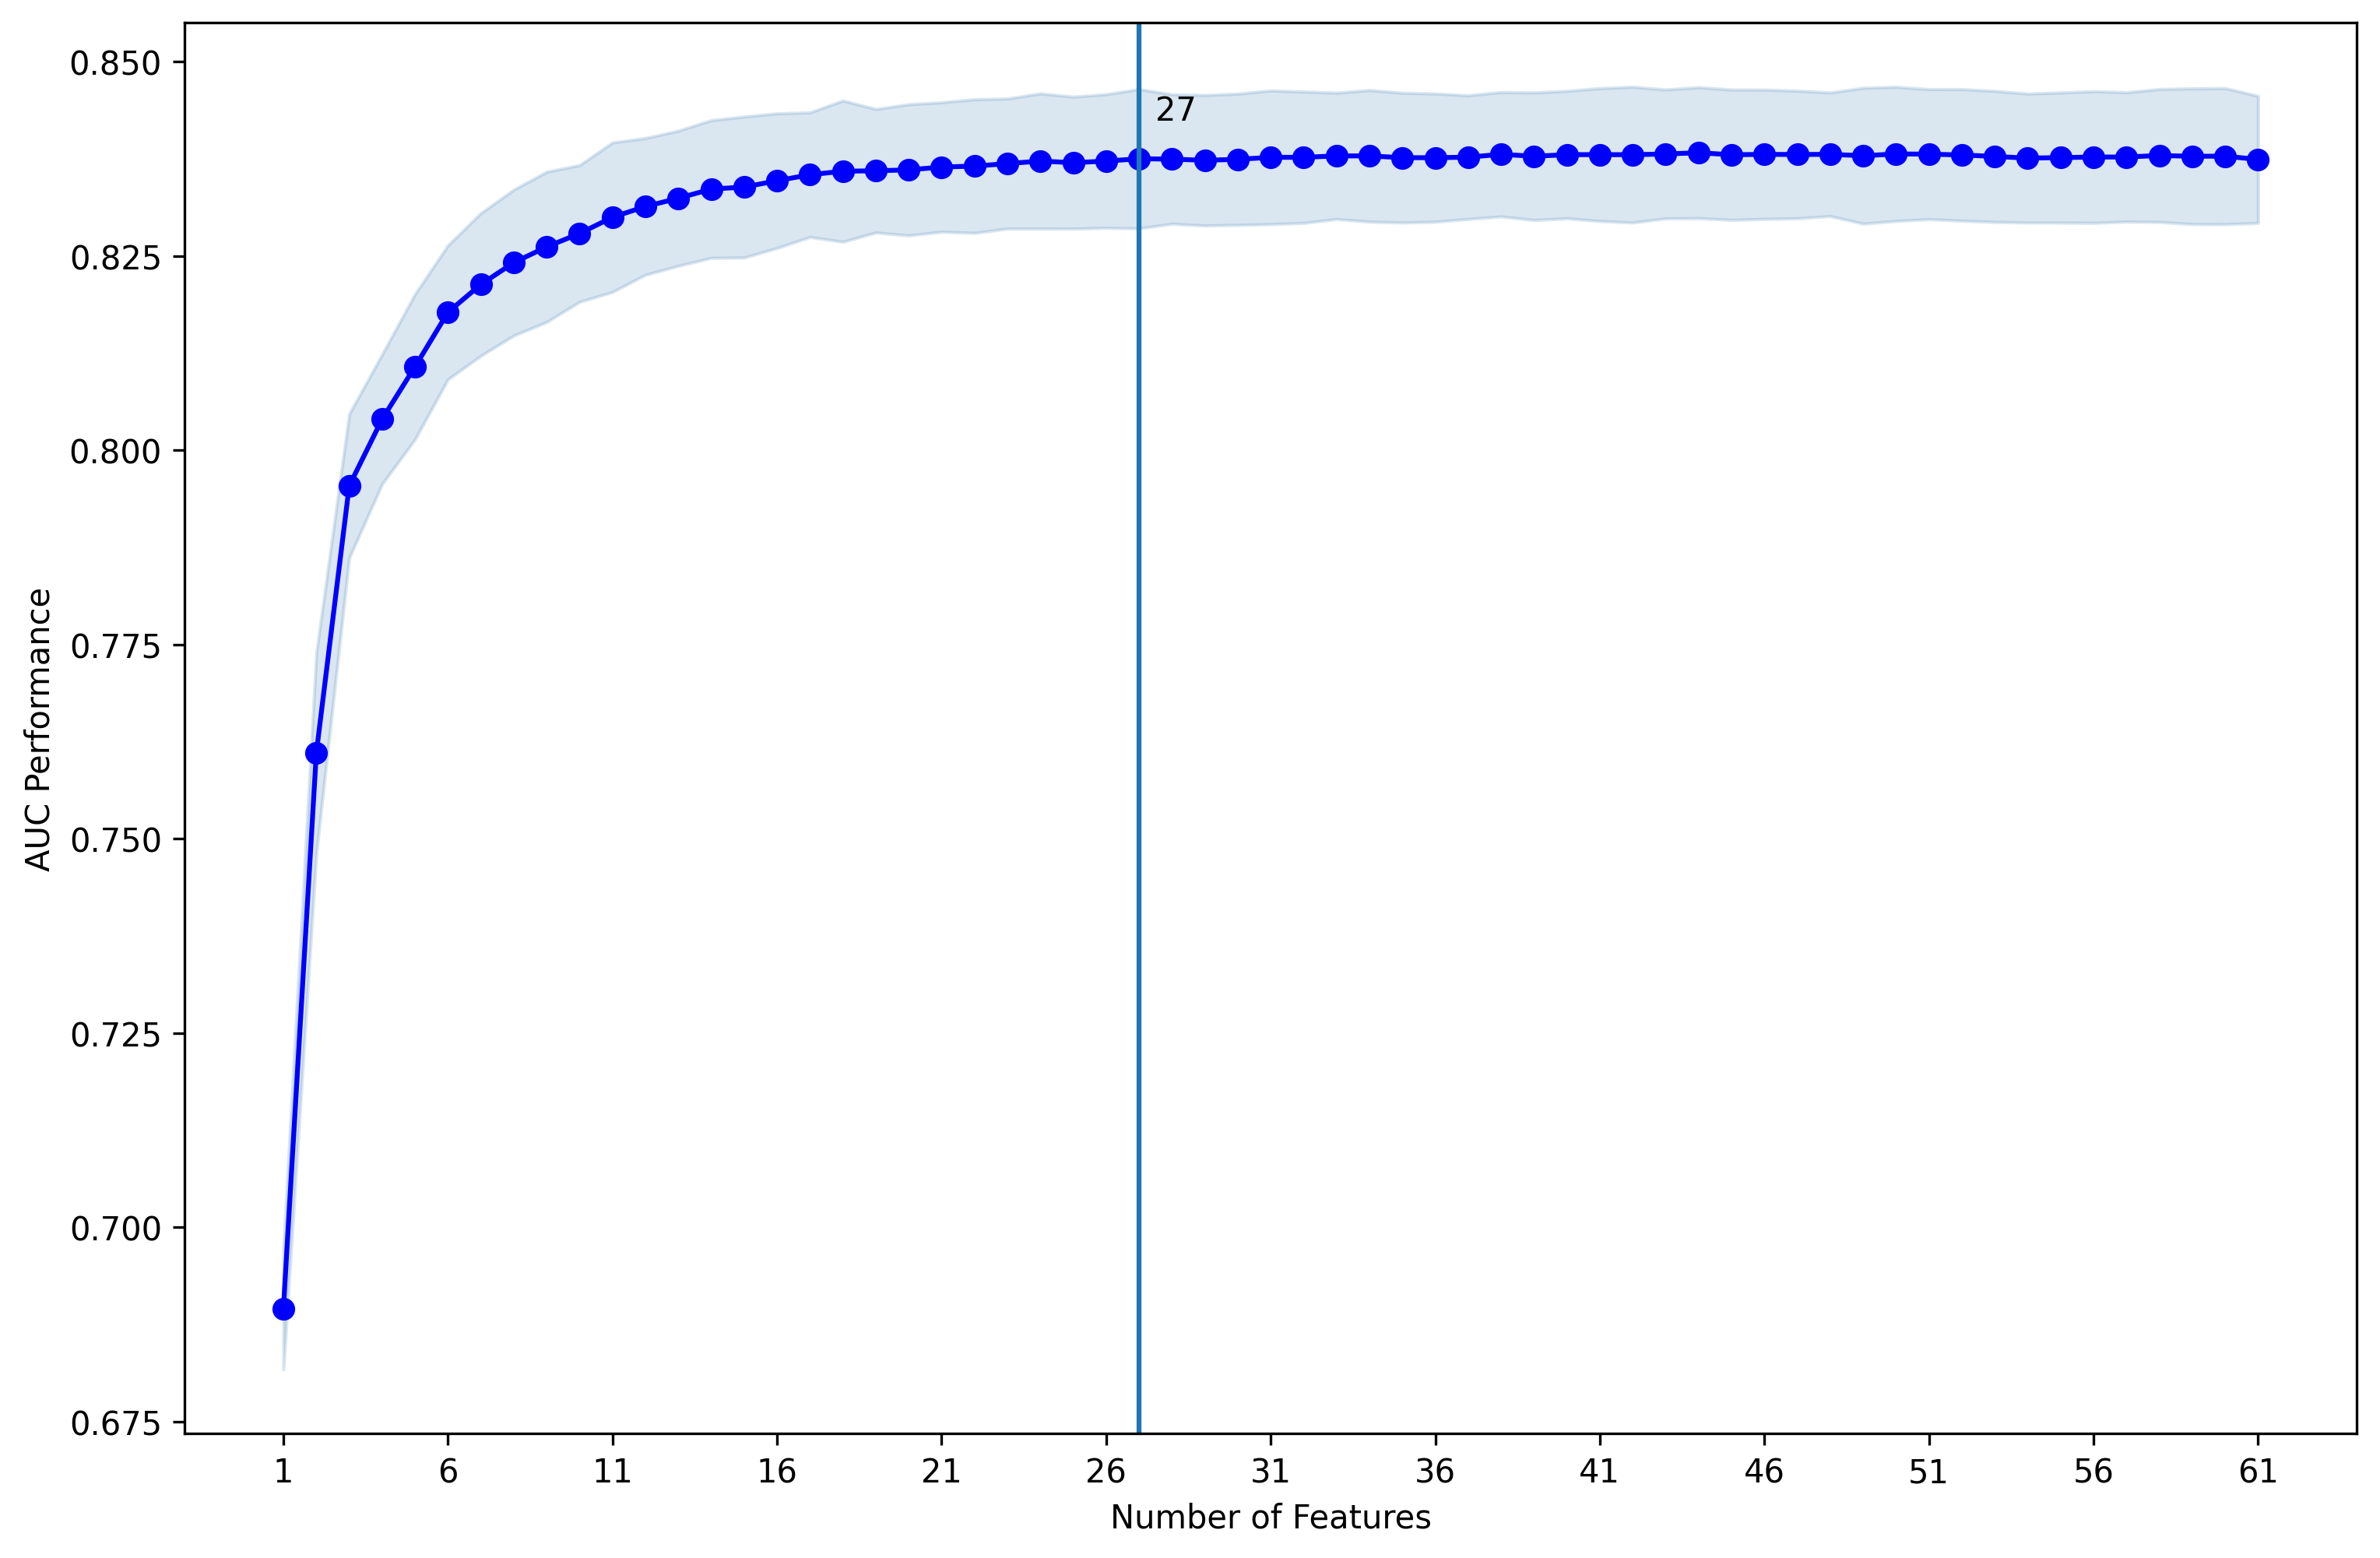

In [40]:
#https://github.com/rasbt/mlxtend/blob/master/mlxtend/plotting/plot_sequential_feature_selection.py
import matplotlib.pyplot as plt

metric_dict = fdict
kind="ci"
color="blue"
bcolor="steelblue"
marker="o"
alpha=0.2
ylabel="AUC Performance"
figsize=None


if figsize is not None:
    fig = plt.subplots(figsize=figsize)
else:
    fig= plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')

k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]["avg_score"] for k in k_feat]

if kind:
    upper, lower = [], []
    if kind == "ci":
        kind = "ci_bound"

    for k in k_feat:
        upper.append(metric_dict[k]["avg_score"] + metric_dict[k][kind])
        lower.append(metric_dict[k]["avg_score"] - metric_dict[k][kind])

    plt.fill_between(k_feat, upper, lower, alpha=alpha, color=bcolor, lw=1)

    if kind == "ci_bound":
        kind = "Confidence Interval (%d%%)" % (confidence_interval * 100)

plt.plot(k_feat, avg, color=color, marker=marker)
plt.axvline(x=len(best_feature_idx))
plt.annotate(len(best_feature_idx), (k_feat[len(best_feature_idx)]-0.5, avg[len(best_feature_idx)]+0.005))
plt.ylabel(ylabel)
plt.xlabel("Number of Features")
feature_min = len(metric_dict[k_feat[0]]["feature_idx"])
feature_max = len(metric_dict[k_feat[-1]]["feature_idx"])
plt.xticks(range(feature_min, feature_max + 1, 5), range(feature_min, feature_max + 1, 5))


In [41]:

from io import BytesIO
# save figure
# (1) save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png')

from PIL import *
import PIL.Image
# (2) load this image into PIL
png2 = Image.open(png1)


# (3) save as TIFF
png2.save('results/' + fig_name_param)
png1.close()

In [112]:
cardioDataCal_Eurosc_II_Train.iloc[:, list(map(int, list(best_feature_idx)))].columns.tolist()

['HospCode',
 'Operation',
 'NYHA',
 'PrevMI',
 'PrevCABG',
 'PrevValve',
 'PrevAoAscArch',
 'PulHTN',
 'CrCl',
 'Diabetes',
 'PulmonaryDisease',
 'Stroke',
 'PVD',
 'LVF2',
 'Urgency',
 'PrevOp',
 'BMI',
 'FirstOperatorGrade',
 'Age',
 'CPS',
 'MVProcedure',
 'CADExtent',
 'Inotropes',
 'NumberGrafts',
 'Ao.Arch.Procedure',
 'CardiacRhythm',
 'mechanicalSupport']